# PersonalityGroup

## Importing and setting up the Dataset

In [29]:
import numpy as np
import pandas as pd
import scipy.stats
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import plotly
import plotly.graph_objs as go
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN

In [30]:
traits_survey_complete = pd.read_csv('/content/data-final.csv', sep='\t')
traits_survey = traits_survey_complete.sample(500000)
traits_survey.head()

EXT1  EXT2  EXT3  ...  country  lat_appx_lots_of_err  long_appx_lots_of_err
48745    4.0   4.0   2.0  ...       IN               26.9167                75.8167
218412   3.0   3.0   3.0  ...       IN               13.0833                80.2833
23044    1.0   4.0   3.0  ...       US                  38.0                  -97.0
414550   5.0   1.0   5.0  ...       NZ              -37.8866                175.469
737016   2.0   3.0   4.0  ...       US                  38.0                  -97.0

[5 rows x 110 columns]

In [33]:
traits_survey = traits_survey.reset_index()
traits_survey.drop(columns=['index'], inplace=True)
print(traits_survey.shape)
traits_survey.head()

(500000, 110)


EXT1  EXT2  EXT3  ...  country  lat_appx_lots_of_err  long_appx_lots_of_err
0   4.0   4.0   2.0  ...       IN               26.9167                75.8167
1   3.0   3.0   3.0  ...       IN               13.0833                80.2833
2   1.0   4.0   3.0  ...       US                  38.0                  -97.0
3   5.0   1.0   5.0  ...       NZ              -37.8866                175.469
4   2.0   3.0   4.0  ...       US                  38.0                  -97.0

[5 rows x 110 columns]

## Exploratory Data Analysis

In [ ]:
traits_survey.dtypes

EXT1                     float64
EXT2                     float64
EXT3                     float64
EXT4                     float64
EXT5                     float64
                          ...   
endelapse                  int64
IPC                        int64
country                   object
lat_appx_lots_of_err      object
long_appx_lots_of_err     object
Length: 110, dtype: object

In [ ]:
number_traits_questions = traits_survey.columns.get_loc('OPN10')
number_traits_questions

49

In [ ]:
pers_traits_questions = traits_survey.columns[: number_traits_questions + 1]
pers_traits_questions

Index(['EXT1', 'EXT2', 'EXT3', 'EXT4', 'EXT5', 'EXT6', 'EXT7', 'EXT8', 'EXT9',
       'EXT10', 'EST1', 'EST2', 'EST3', 'EST4', 'EST5', 'EST6', 'EST7', 'EST8',
       'EST9', 'EST10', 'AGR1', 'AGR2', 'AGR3', 'AGR4', 'AGR5', 'AGR6', 'AGR7',
       'AGR8', 'AGR9', 'AGR10', 'CSN1', 'CSN2', 'CSN3', 'CSN4', 'CSN5', 'CSN6',
       'CSN7', 'CSN8', 'CSN9', 'CSN10', 'OPN1', 'OPN2', 'OPN3', 'OPN4', 'OPN5',
       'OPN6', 'OPN7', 'OPN8', 'OPN9', 'OPN10'],
      dtype='object')

In [ ]:
for col in pers_traits_questions:
    print(traits_survey[col].value_counts())

3.0    142191
1.0    123130
2.0     97962
4.0     94223
5.0     39799
0.0      1789
Name: EXT1, dtype: int64
3.0    120712
2.0    115905
1.0    103348
4.0     93919
5.0     62184
0.0      3026
Name: EXT2, dtype: int64
4.0    140069
3.0    132373
2.0     94503
5.0     91353
1.0     37879
0.0      2917
Name: EXT3, dtype: int64
3.0    137781
4.0    126888
2.0    102580
5.0     78344
1.0     50140
0.0      3361
Name: EXT4, dtype: int64
4.0    147567
3.0    115334
5.0     94848
2.0     87857
1.0     48657
0.0      4831
Name: EXT5, dtype: int64
2.0    167003
1.0    130987
3.0     94280
4.0     68507
5.0     35277
0.0      3040
Name: EXT6, dtype: int64
1.0    117097
2.0    112107
4.0     97267
3.0     95546
5.0     73025
0.0      4052
Name: EXT7, dtype: int64
4.0    135787
5.0    122439
3.0    113189
2.0     86298
1.0     38279
0.0      3102
Name: EXT8, dtype: int64
4.0    119341
2.0    109350
3.0    105707
1.0     85368
5.0     75992
0.0      3336
Name: EXT9, dtype: int64
5.0    153880
4.0  

The first 50 columns of traits_survey corresponds to the questions made according to the Big Five Personality Traits, so their values (responses) are 0., 1., 2., 3., 4. or 5., given that the answers were asked for in that scale.

In [ ]:
traits_questions_data = traits_survey[pers_traits_questions]
traits_questions_data.describe()

EXT1           EXT2  ...           OPN9          OPN10
count  499094.000000  499094.000000  ...  499094.000000  499094.000000
mean        2.647826       2.772804  ...       4.123734       3.958992
std         1.264556       1.322884  ...       1.040790       1.033660
min         0.000000       0.000000  ...       0.000000       0.000000
25%         1.000000       2.000000  ...       4.000000       3.000000
50%         3.000000       3.000000  ...       4.000000       4.000000
75%         4.000000       4.000000  ...       5.000000       5.000000
max         5.000000       5.000000  ...       5.000000       5.000000

[8 rows x 50 columns]

The following 50 columns correspond to the time lapses it took for each person to answer.

In [ ]:
times_per_questions = traits_survey[traits_survey.columns[
number_traits_questions + 1: traits_survey.columns.get_loc('OPN10_E') + 1]]
times_per_questions

EXT1_E   EXT2_E  EXT3_E   EXT4_E  ...  OPN7_E   OPN8_E   OPN9_E  OPN10_E
257857  425484.0   4000.0  1385.0   2808.0  ...  6488.0   2801.0  51930.0   1110.0
290534    9810.0   2121.0  2600.0   2672.0  ...  5199.0   2432.0   2559.0   2336.0
467192    3549.0   1784.0  3432.0   6309.0  ...  6448.0   3000.0   2952.0   3674.0
784540    4215.0   2961.0  1818.0  11875.0  ...  2960.0   3726.0   1908.0   1434.0
414895    4661.0   5734.0  2717.0   3761.0  ...  2216.0   5016.0   3082.0   1904.0
...          ...      ...     ...      ...  ...     ...      ...      ...      ...
874642   26692.0   8441.0  5444.0   7624.0  ...  4844.0   3719.0   8215.0   4928.0
615658    6635.0   1044.0  4359.0   3561.0  ...  1737.0   1715.0   2564.0   1488.0
580282   90591.0  17529.0  8447.0  15333.0  ...  7890.0  10230.0  16869.0   6673.0
308901    3058.0   1521.0  3726.0   2760.0  ...  3122.0   2282.0   1873.0   1288.0
450120    8108.0   3414.0  2970.0   3689.0  ...  4189.0   6790.0   3234.0   3417.0

[500000 rows x 50 columns]

In [ ]:
times_per_questions.describe()

EXT1_E        EXT2_E  ...        OPN9_E       OPN10_E
count  4.990940e+05  4.990940e+05  ...  4.990940e+05  4.990940e+05
mean   9.221936e+04  8.463290e+03  ...  6.657561e+03  6.306422e+03
std    3.678563e+06  5.686207e+05  ...  5.444649e+05  6.028708e+05
min   -3.575104e+06 -3.092500e+04  ... -2.073000e+04 -2.264900e+04
25%    4.792000e+03  2.383000e+03  ...  2.330000e+03  1.483000e+03
50%    7.342000e+03  3.416000e+03  ...  3.273000e+03  2.192000e+03
75%    1.224275e+04  5.074000e+03  ...  4.794000e+03  3.363000e+03
max    1.039338e+09  2.617734e+08  ...  3.470326e+08  3.344289e+08

[8 rows x 50 columns]

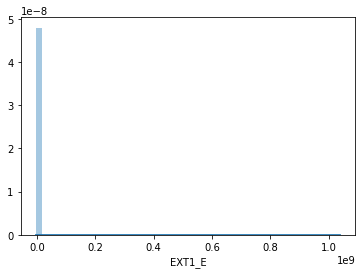

In [ ]:
sns.distplot(traits_survey['EXT1_E'])

In [ ]:
times_per_questions['EXT1_E'].value_counts()

0.0         4613
4904.0        82
4125.0        77
4182.0        76
4780.0        76
            ... 
48781.0        1
69950.0        1
97557.0        1
195110.0       1
262137.0       1
Name: EXT1_E, Length: 62222, dtype: int64

In [34]:
int_data = np.array(np.where(traits_survey.dtypes == int)).flatten()
traits_survey.iloc[:,int_data]

endelapse  IPC
0               9    2
1              10    1
2               9   37
3              16  141
4               9    1
...           ...  ...
499995         10    1
499996         17    2
499997         17    1
499998         43    1
499999         14    2

[500000 rows x 2 columns]

In [35]:
traits_survey['endelapse'] = traits_survey['endelapse'].astype('float')
traits_survey['IPC'] = traits_survey['IPC'].astype('float')

In [ ]:
'''numeric_data = np.array(np.where(traits_survey.dtypes == float)).flatten()
numeric_data'''

'numeric_data = np.array(np.where(traits_survey.dtypes == float)).flatten()\nnumeric_data'

In [36]:
f_cols = []
for i in range(traits_survey.shape[1]):
    if pd.DataFrame(traits_survey.dtypes).reset_index()[0][i] == 'float':
        f_cols.append(pd.DataFrame(traits_survey.dtypes).reset_index()['index'][i])
f_cols

['EXT1',
 'EXT2',
 'EXT3',
 'EXT4',
 'EXT5',
 'EXT6',
 'EXT7',
 'EXT8',
 'EXT9',
 'EXT10',
 'EST1',
 'EST2',
 'EST3',
 'EST4',
 'EST5',
 'EST6',
 'EST7',
 'EST8',
 'EST9',
 'EST10',
 'AGR1',
 'AGR2',
 'AGR3',
 'AGR4',
 'AGR5',
 'AGR6',
 'AGR7',
 'AGR8',
 'AGR9',
 'AGR10',
 'CSN1',
 'CSN2',
 'CSN3',
 'CSN4',
 'CSN5',
 'CSN6',
 'CSN7',
 'CSN8',
 'CSN9',
 'CSN10',
 'OPN1',
 'OPN2',
 'OPN3',
 'OPN4',
 'OPN5',
 'OPN6',
 'OPN7',
 'OPN8',
 'OPN9',
 'OPN10',
 'EXT1_E',
 'EXT2_E',
 'EXT3_E',
 'EXT4_E',
 'EXT5_E',
 'EXT6_E',
 'EXT7_E',
 'EXT8_E',
 'EXT9_E',
 'EXT10_E',
 'EST1_E',
 'EST2_E',
 'EST3_E',
 'EST4_E',
 'EST5_E',
 'EST6_E',
 'EST7_E',
 'EST8_E',
 'EST9_E',
 'EST10_E',
 'AGR1_E',
 'AGR2_E',
 'AGR3_E',
 'AGR4_E',
 'AGR5_E',
 'AGR6_E',
 'AGR7_E',
 'AGR8_E',
 'AGR9_E',
 'AGR10_E',
 'CSN1_E',
 'CSN2_E',
 'CSN3_E',
 'CSN4_E',
 'CSN5_E',
 'CSN6_E',
 'CSN7_E',
 'CSN8_E',
 'CSN9_E',
 'CSN10_E',
 'OPN1_E',
 'OPN2_E',
 'OPN3_E',
 'OPN4_E',
 'OPN5_E',
 'OPN6_E',
 'OPN7_E',
 'OPN8_E',
 'OPN9_E',
 '

In [37]:
numeric_data = traits_survey[f_cols]
numeric_data.corr()

EXT1      EXT2      EXT3  ...  testelapse  endelapse       IPC
EXT1         1.000000 -0.438972  0.464020  ...    0.000250  -0.001845  0.055081
EXT2        -0.438972  1.000000 -0.411669  ...    0.000492  -0.001880 -0.026927
EXT3         0.464020 -0.411669  1.000000  ...    0.001759  -0.002610  0.051813
EXT4        -0.485109  0.552730 -0.433095  ...    0.000041   0.002122 -0.037694
EXT5         0.477712 -0.500681  0.554245  ...   -0.000415   0.001883  0.032055
...               ...       ...       ...  ...         ...        ...       ...
screenh     -0.005092  0.004184  0.017889  ...   -0.002548  -0.002356 -0.001355
introelapse  0.001860 -0.002601  0.002263  ...    0.114484   0.000902 -0.002292
testelapse   0.000250  0.000492  0.001759  ...    1.000000   0.003897 -0.000584
endelapse   -0.001845 -0.001880 -0.002610  ...    0.003897   1.000000 -0.000360
IPC          0.055081 -0.026927  0.051813  ...   -0.000584  -0.000360  1.000000

[106 rows x 106 columns]

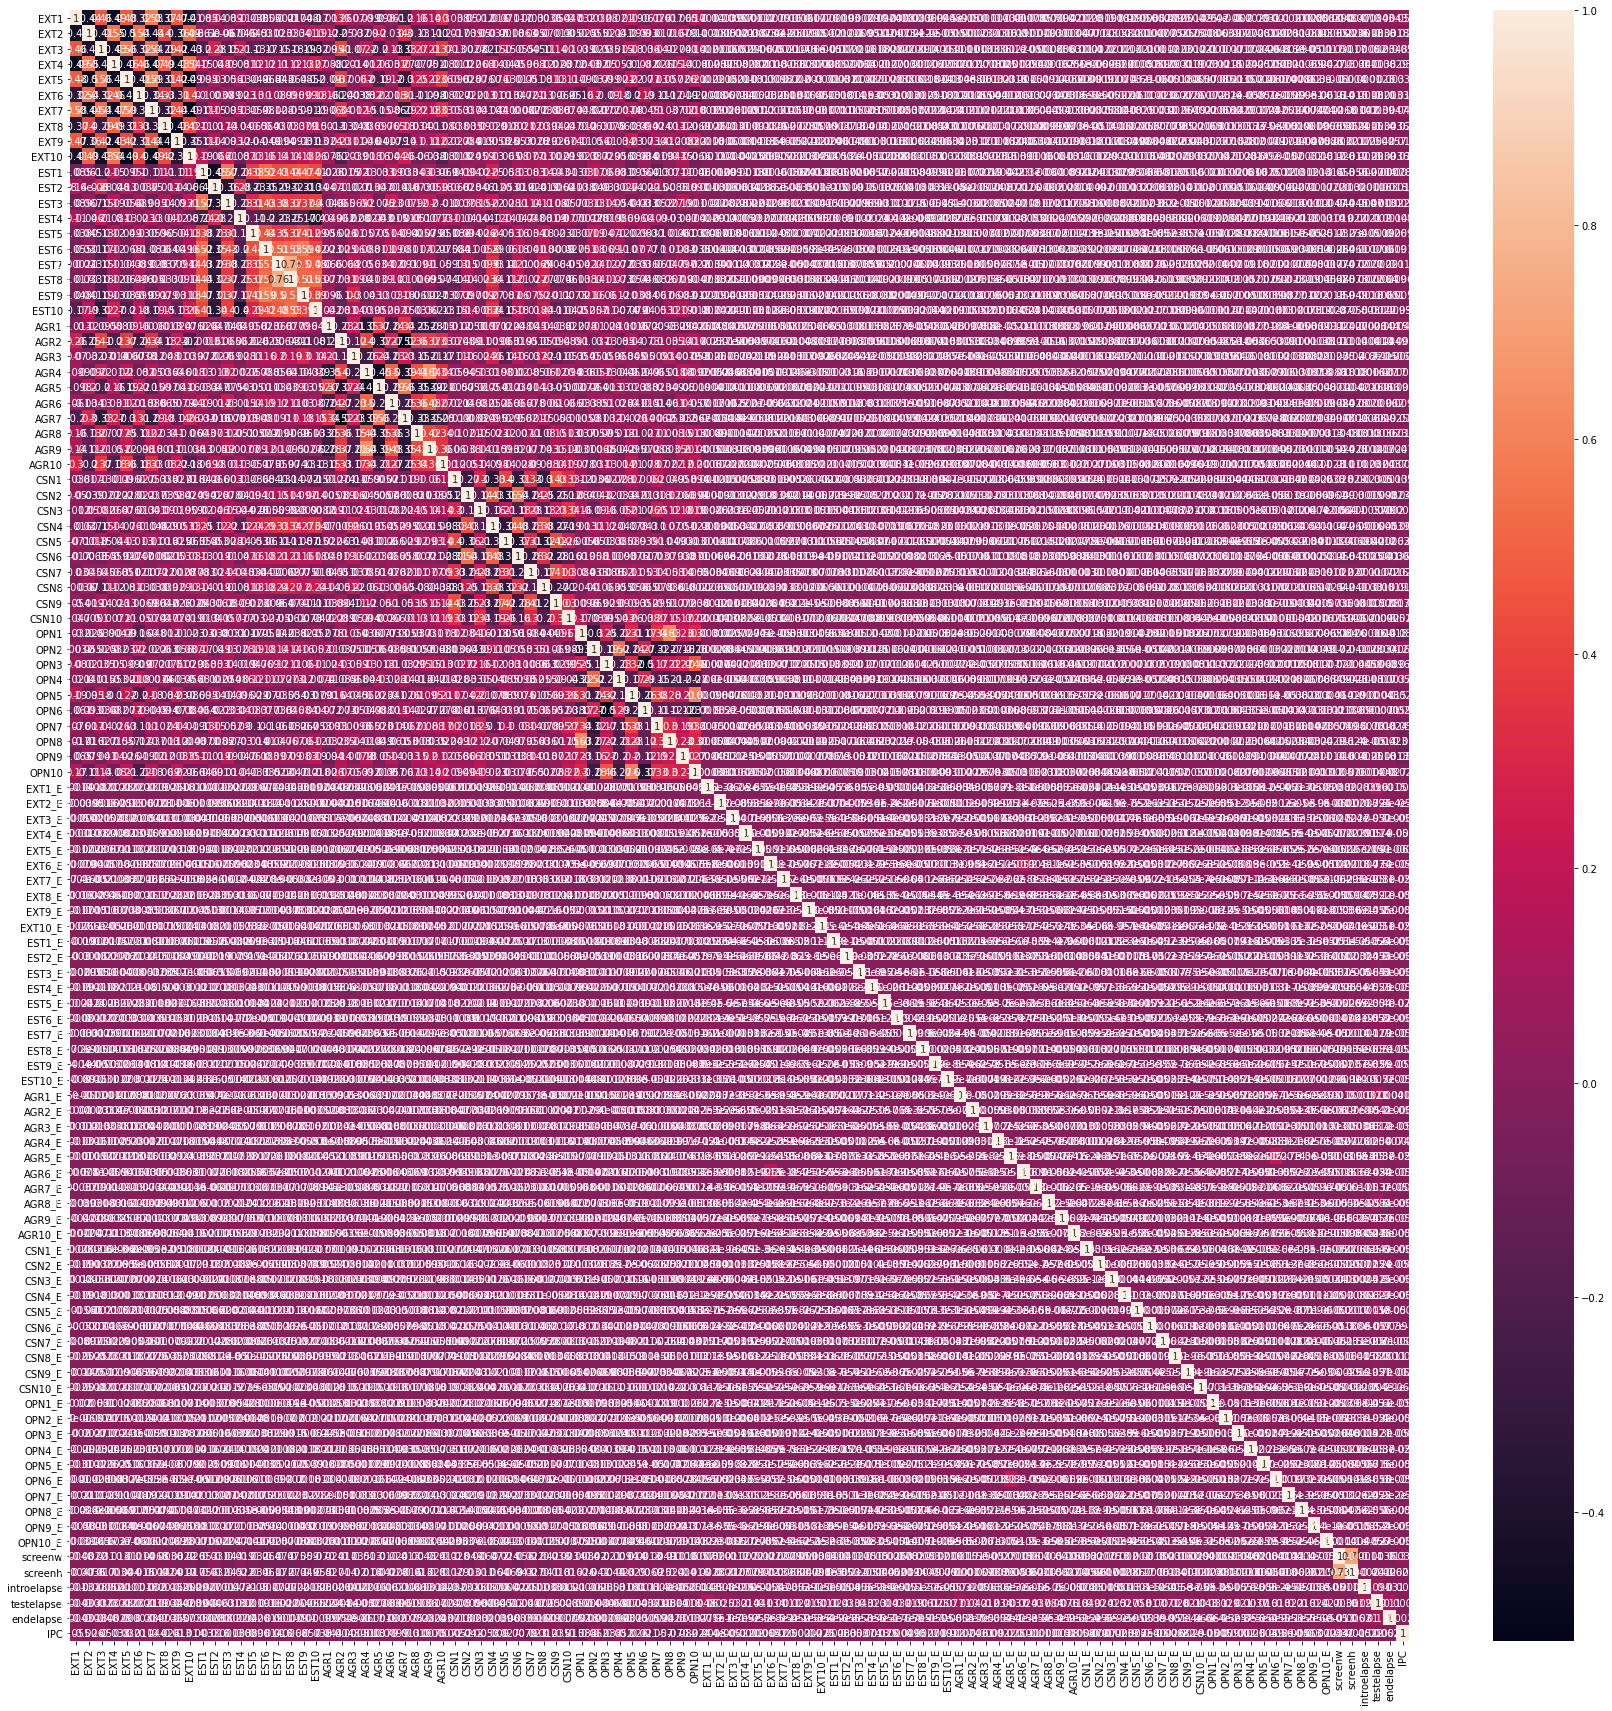

In [ ]:
plt.figure(figsize=(30.0, 30.0))
sns.heatmap(numeric_data.corr(), annot=True)

NameError: ignored

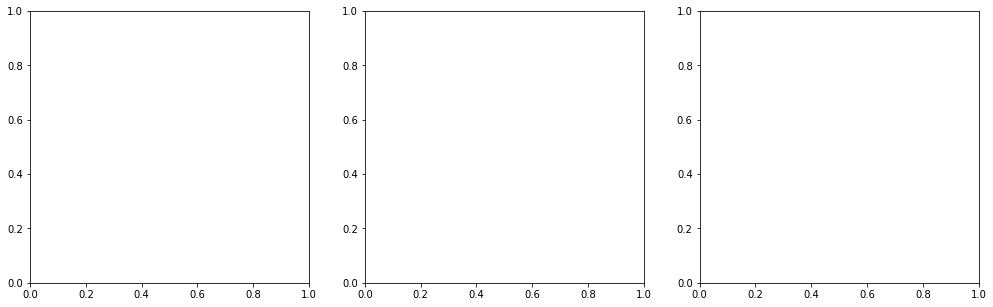

In [ ]:
fig, ax = plt.subplots(nrows=1,ncols=3,figsize=(17,5))

sns.distplot(df["Age"],ax=ax[0])
ax[0].set_title("Age Distribution")

sns.distplot(df["Income"], ax=ax[1])
ax[1].set_title("Income Distribution")

sns.distplot(df["SpendingScore"], ax=ax[2])
ax[2].set_title("Spending Score Distribution")
plt.show()

In [ ]:
traits_survey.columns[traits_survey.columns.get_loc('OPN10_E') + 1:]

In [ ]:
traits_survey['dateload'].value_counts()

In [ ]:
# dateload column will be dropped due to the timestamp does not represent a trivial feature for the outcome

In [38]:
traits_survey.drop(columns=['dateload'], inplace=True)

In [ ]:
print(len(traits_survey['screenw'].value_counts()))
sns.boxplot(traits_survey['screenw'], whis=3.5)

In [39]:
# screenw and screenh will be dropped as well due to they are the width and height of the screen in pixels
# respectively where the survey was done

traits_survey.drop(columns=['screenw', 'screenh'], inplace=True)

In [ ]:
'''ctgr_cols_ind = np.where(traits_survey.dtypes != float)
traits_survey.columns[ctgr_cols_ind[0][0] : ctgr_cols_ind[0][0] + 3]'''

In [40]:
cols_list = []
for ind in np.where(traits_survey.dtypes != float):
    cols_list.append(traits_survey.columns[ind])
ctgr_cols = cols_list[0]
ctgr_cols

Index(['country', 'lat_appx_lots_of_err', 'long_appx_lots_of_err'], dtype='object')

In [ ]:
print(traits_survey.country.value_counts())
plt.boxplot(traits_survey['country'])

## Data Preprocessing

In [ ]:
for ind in np.where(traits_survey.dtypes == object):
  
  print(traits_survey.columns[ind])

In [41]:
ctgr_data = traits_survey[ctgr_cols]
ctgr_data

country lat_appx_lots_of_err long_appx_lots_of_err
0           IN              26.9167               75.8167
1           IN              13.0833               80.2833
2           US                 38.0                 -97.0
3           NZ             -37.8866               175.469
4           US                 38.0                 -97.0
...        ...                  ...                   ...
499995      GB              51.2025               -0.7875
499996      US              45.8207             -120.8217
499997      US                 38.0                 -97.0
499998      CA              43.6425              -79.3872
499999      IN                 20.0                  77.0

[500000 rows x 3 columns]

In [ ]:
dummy_ctgr_data = pd.get_dummies(ctgr_data)
dummy_ctgr_data

In [ ]:
stand_data = preprocessing.scale(numerical_data)
stand_data

## K-Means Clustering